In [ ]:
# Affordable Housing by Council District

In [2]:
import pandas as pd
import geopandas as gpd

In [4]:
#importing data and defining variable
AF = gpd.read_file('AF Projects.csv')

In [7]:
#checking data type
type(AF)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#Looking at how manu rows and columns there are in this dataset. There are 558 rows and 32 columns

In [5]:
AF.shape

(558, 32)

In [6]:
#Looking at the column names
AF.columns.to_list()

['APN',
 'PROJECT NUMBER',
 'NAME',
 'DEVELOPMENT STAGE',
 'CONSTRUCTION TYPE',
 'SITE ADDRESS',
 'SITE  COUNCIL DISTRICT',
 'SITE #',
 'SITE COMMUNITY',
 'SITE UNITS',
 'PROJECT TOTAL UNITS',
 'HOUSING TYPE',
 'SUPPORTIVE HOUSING',
 'SH UNITS PER SITE',
 'DATE FUNDED',
 'LAHD FUNDED',
 'LEVERAGE',
 'TAX EXEMPT CONDUIT BOND',
 'TDC',
 'IN-SERVICE DATE',
 'DEVELOPER',
 'MANAGEMENT COMPANY',
 'CONTACT PHONE',
 'PHOTO',
 'JOBS',
 'PROJECT SUMMARY URL',
 'CONTRACT NUMBERS',
 'DATE STAMP',
 'SITE LONGITUDE',
 'SITE LATITUDE',
 'GPS_COORDS ON MAP',
 'geometry']

In [ ]:
#Data type of each column

In [14]:
AF.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   APN                      558 non-null    object  
 1   PROJECT NUMBER           558 non-null    object  
 2   NAME                     558 non-null    object  
 3   DEVELOPMENT STAGE        558 non-null    object  
 4   CONSTRUCTION TYPE        558 non-null    object  
 5   SITE ADDRESS             558 non-null    object  
 6   SITE  COUNCIL DISTRICT   558 non-null    object  
 7   SITE #                   558 non-null    object  
 8   SITE COMMUNITY           558 non-null    object  
 9   SITE UNITS               558 non-null    object  
 10  PROJECT TOTAL UNITS      558 non-null    object  
 11  HOUSING TYPE             558 non-null    object  
 12  SUPPORTIVE HOUSING       558 non-null    object  
 13  SH UNITS PER SITE        558 non-null    object  
 14  DA

In [ ]:
#What the Data looks like

In [15]:
AF.head()

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP,geometry
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,...,N/A,click here (http://hcidapp.lacity.org/mpphotos...,,click here (http://hcidapp.lacity.org/ahtfRepo...,,2023-01-09T00:00:00.000,-118.26681,34.05209,POINT (-118.26681 34.05209),None
1,6032019034,14-121272,MARTHA BRYANT MANOR- RECAP,In-Service,ACQUISITION + REHAB,"8300 S HOOVER ST Los Angeles, CA 90044",8,1,VERMONT VISTA,77,...,(310) 358-3489,click here (http://hcidapp.lacity.org/mpphotos...,,click here (http://hcidapp.lacity.org/ahtfRepo...,,2023-01-09T00:00:00.000,-118.28691,33.96297,POINT (-118.28691 33.96297),None
2,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,...,(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,,click here (http://hcidapp.lacity.org/ahtfRepo...,,2023-01-09T00:00:00.000,-118.34182,34.03071,POINT (-118.34182 34.03071),None
3,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,...,(714) 533-3450,click here (http://hcidapp.lacity.org/mpphotos...,226,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2023-01-09T00:00:00.000,-118.25748,34.01115,POINT (-118.25748 34.01115),None
4,4012018025,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,...,(213) 225-2772,click here (http://hcidapp.lacity.org/mpphotos...,110,click here (http://hcidapp.lacity.org/ahtfRepo...,C-111486,2023-01-09T00:00:00.000,-118.33108,33.97348,POINT (-118.33108 33.97348),None


In [ ]:
#Counting the number of sites in each council district

In [16]:
AF['SITE  COUNCIL DISTRICT'].value_counts()

1     103
13     75
9      71
8      63
14     58
10     51
15     36
6      29
7      19
11     14
2      14
4       9
3       9
5       5
12      2
Name: SITE  COUNCIL DISTRICT, dtype: int64

In [18]:
# save it as a variable
line_count = AF['SITE  COUNCIL DISTRICT'].value_counts()
line_count

1     103
13     75
9      71
8      63
14     58
10     51
15     36
6      29
7      19
11     14
2      14
4       9
3       9
5       5
12      2
Name: SITE  COUNCIL DISTRICT, dtype: int64

In [19]:
# counting the number of specific variable in a column
line_count = line_count.reset_index()
line_count

,index,District,count
0,0,1,103
1,1,13,75
2,2,9,71
3,3,8,63
4,4,14,58
5,5,10,51
6,6,15,36
7,7,6,29
8,8,7,19
9,9,11,14


In [23]:
# Changing the column names
line_count.columns = ['District', 'count']

<AxesSubplot: title={'center': 'Sites by Council District'}, xlabel='District'>

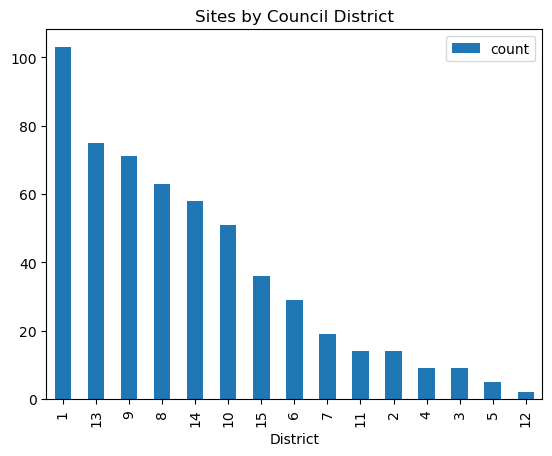

In [24]:
# Plot with number of Affordable Housing plots bu council district
line_count.plot.bar(x = 'District', y = 'count', title = 'Sites by Council District')

In [25]:
AF.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   APN                      558 non-null    object  
 1   PROJECT NUMBER           558 non-null    object  
 2   NAME                     558 non-null    object  
 3   DEVELOPMENT STAGE        558 non-null    object  
 4   CONSTRUCTION TYPE        558 non-null    object  
 5   SITE ADDRESS             558 non-null    object  
 6   SITE  COUNCIL DISTRICT   558 non-null    object  
 7   SITE #                   558 non-null    object  
 8   SITE COMMUNITY           558 non-null    object  
 9   SITE UNITS               558 non-null    object  
 10  PROJECT TOTAL UNITS      558 non-null    object  
 11  HOUSING TYPE             558 non-null    object  
 12  SUPPORTIVE HOUSING       558 non-null    object  
 13  SH UNITS PER SITE        558 non-null    object  
 14  DA

In [29]:
#trimming data to just six columns
AF[['NAME','SITE  COUNCIL DISTRICT','PROJECT TOTAL UNITS','SITE LONGITUDE','SITE LONGITUDE','geometry']]

,NAME,SITE COUNCIL DISTRICT,PROJECT TOTAL UNITS,SITE LONGITUDE,SITE LONGITUDE,geometry
0,SAN LUCAS APARTMENTS,1,196,-118.26681,-118.26681,None
1,MARTHA BRYANT MANOR- RECAP,8,77,-118.28691,-118.28691,None
2,LEEWARD APTS. (SITE 7),10,257,-118.34182,-118.34182,None
3,FLORENCE MILLS (SITE 5),9,74,-118.25748,-118.25748,None
4,MORGAN PLACE SENIOR APTS.,8,55,-118.33108,-118.33108,None
...,...,...,...,...,...,...
553,RESEDA THEATER SENIOR HOUSING (CANBY WOODS WEST),3,26,-118.53497,-118.53497,None
554,GRAND AVENUE PARCEL Q APTS.,14,323,-118.24805,-118.24805,None
555,FLORENCE MILLS (SITE 4),9,74,-118.2567,-118.2567,None
556,LAS MARGARITAS (SITE 2),14,42,-118.20967,-118.20967,None


In [30]:
#renaming the data to make is easier to manipulate
desired_columns = ['NAME','SITE  COUNCIL DISTRICT','PROJECT TOTAL UNITS','SITE LONGITUDE','SITE LONGITUDE','geometry']
AF_trimmed = AF[desired_columns].copy()
AF_trimmed

,NAME,SITE COUNCIL DISTRICT,PROJECT TOTAL UNITS,SITE LONGITUDE,SITE LONGITUDE,geometry
0,SAN LUCAS APARTMENTS,1,196,-118.26681,-118.26681,None
1,MARTHA BRYANT MANOR- RECAP,8,77,-118.28691,-118.28691,None
2,LEEWARD APTS. (SITE 7),10,257,-118.34182,-118.34182,None
3,FLORENCE MILLS (SITE 5),9,74,-118.25748,-118.25748,None
4,MORGAN PLACE SENIOR APTS.,8,55,-118.33108,-118.33108,None
...,...,...,...,...,...,...
553,RESEDA THEATER SENIOR HOUSING (CANBY WOODS WEST),3,26,-118.53497,-118.53497,None
554,GRAND AVENUE PARCEL Q APTS.,14,323,-118.24805,-118.24805,None
555,FLORENCE MILLS (SITE 4),9,74,-118.2567,-118.2567,None
556,LAS MARGARITAS (SITE 2),14,42,-118.20967,-118.20967,None


In [39]:
#Renaming the columns to make my life easier
AF_trimmed.columns = ['Name','District', 'Unit', 'Long', 'Lat', 'geometry']

In [40]:
# List of all sites in District 14
AF_trimmed[AF_trimmed.District == '14']

,Name,District,Unit,Long,Lat,geometry
10,LORENA PLAZA,14,49,-118.19428,-118.19428,None
11,WEINGART TOWER A-134 (FKAWEINGART TOWER HHH PS...,14,134,-118.244,-118.244,None
45,CHARLES COBB APARTMENTS,14,76,-118.24454,-118.24454,None
61,NEW TERMINAL HOTEL,14,40,-118.24415,-118.24415,None
67,CIELITO LINDO (1ST AND SOTO APTS I),14,50,-118.20893,-118.20893,None
80,SICHEL FAMILY APARTMENTS,14,37,-118.21305,-118.21305,None
86,LEXINGTON APARTMENTS A/B,14,251,-118.20117,-118.20117,None
88,RAINBOW APARTMENTS,14,89,-118.2463,-118.2463,None
113,NEW PERSHING APARTMENTS,14,69,-118.2484,-118.2484,None
122,SP7 APARTMENTS,14,100,-118.24687,-118.24687,None


In [44]:
save('AF.html')

The following commands were written to file `(AF.html).py`:
AF = gpd.read_file('Week 2/AF Projects.csv')
import pandas as pd
import geopandas as gpd
AF = gpd.read_file('Week 2/AF Projects.csv')
AF = gpd.read_file('AF Projects.csv')
AF.shape
AF.columns.to_list()
type(AF)
AF.head()
AF.info
Info(AF)
line_count.plot()
line_count = line_count.reset_index()
line_count
AF.info(AF)
AF.info()
AF.head()
AF['SITE  COUNCIL DISTRICT'].value_counts()
line_count = line_count.reset_index()
line_count
# save it as a variable
line_count = AF['SITE  COUNCIL DISTRICT'].value_counts()
line_count
line_count = line_count.reset_index()
line_count
line_count.plot()
line_count.plot.bar(x = 'SITE  COUNCIL DISTRICT', y = 'count', title = 'Sites by Council District')
line_count.plot.bar(x = 'SITE  COUNCIL DISTRICT', y = 'index', title = 'Sites by Council District')
line_count.columns = ['District', 'count']
line_count.plot.bar(x = 'District', y = 'count', title = 'Sites by Council District')
AF.info()
AF[['NAME','